#  WBSA Lawyer Registration Analysis:

The data analysis is based on a comprehensive summary of registered lawyers in the United States. The research provides critical insights into the national legal landscape, establishes an understanding of the competitive market, and identifies key strategic opportunities.

### Key Insights:

* Geographic Distribution 
* Market Concentration Analysis
* Professional Status
* Data Processing Quality
* Strategic Implications for Lead Generation

## Data cleaning and Processing


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from matplotlib.patches import Patch
import warnings
warnings.filterwarnings('ignore')


In [43]:
wbsa_df = pd.read_json(r"C:\Users\Mteto\Desktop\Scrappy\camoufox_wbsa\wbsa_results.json")

df = wbsa_df.copy()

sns.set_style('dark')
# plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [44]:
# Get an overview of the dataset

df.head()

,license_number,first_name,last_name,city,status,phone
0,466,J. Richard,Aramburu,Seattle,Active,(206) 625-9515
1,467,William Nevin,Appel,Friday Harbor,Active,(206) 714-8052
2,491,Croil,Anderson,Seattle,Active,(206) 622-8000
3,498,George William,Akers JR,Seattle,Active,(206) 523-1997
4,507,Michael Louis,Jacobs,Seattle,Active,(206) 547-1105


In [45]:
df.shape

(34182, 6)

In [46]:
# check NaN values

df.isnull().sum()

license_number    0
first_name        0
last_name         0
city              0
status            0
phone             0
dtype: int64

In [47]:
# Get an overview of data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34182 entries, 0 to 34181
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   license_number  34182 non-null  int64 
 1   first_name      34182 non-null  object
 2   last_name       34182 non-null  object
 3   city            34182 non-null  object
 4   status          34182 non-null  object
 5   phone           34182 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.6+ MB


In [48]:
# strip all non‑digits

df['phone_clean'] = df['phone'].str.replace(r'\D+', '', regex=True)

# convert phone column on US based numbers

def format_phone_number(phone_str):
    
  if len(phone_str) == 10:
    return '+1' + phone_str
  else:
    return '+' + phone_str


df['phone_clean'] = df['phone_clean'].apply(format_phone_number)

In [49]:
# drop the old phone column

df.drop(columns='phone', inplace=True)

In [50]:
# check duplicated columns

df.T.duplicated().any()

False

In [51]:
# check duplicated rows

df.duplicated().any()

False

## Statistical Analysis & Visulization: Data Intepretation

In [52]:
df.head(2)

,license_number,first_name,last_name,city,status,phone_clean
0,466,J. Richard,Aramburu,Seattle,Active,+12066259515
1,467,William Nevin,Appel,Friday Harbor,Active,+12067148052


In [53]:
# Determine the total number of licensed lawyers in the US

df['city'].value_counts()

Seattle             10801
Portland             1549
Spokane              1532
Tacoma               1373
Olympia              1274
                    ...  
Sperryville             1
Bloomfield Hills        1
Osten                   1
Junction City           1
Ooltewah                1
Name: city, Length: 1738, dtype: int64

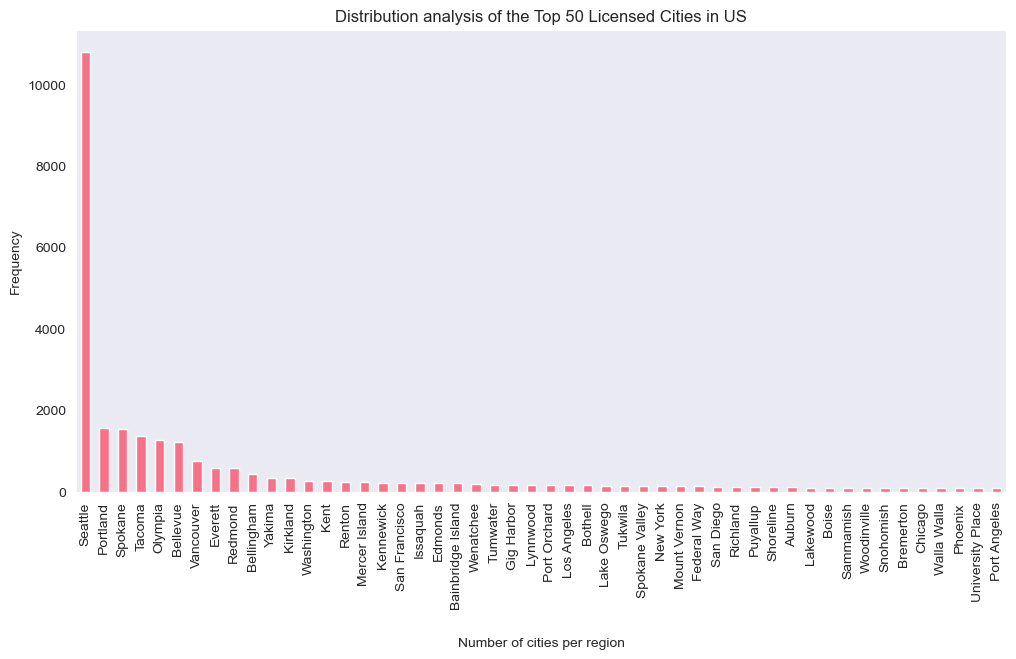

In [67]:
# Get an overview distribution of the top 50 lincesed States in US

distribution_count = df['city'].value_counts().head(50)

plt.figure(figsize=(12,6))
distribution_count.plot(kind='bar')
plt.title('Distribution analysis of the Top 50 Licensed Cities in US')
plt.xlabel('Number of cities per region', labelpad=20)
plt.ylabel('Frequency')
plt.show()
          



In [55]:
# Determine the categories using Absolute Thresholds
# The 75% quantile did not have a spread in the middle range. 

city_counts = df['city'].value_counts()

def categorize_city(city):
    count = city_counts.get(city, 0)
    if count >= 1000:
        return 'Top_cities'
    elif count >= 100:
        return 'High_cities'
    elif count >= 50:
        return 'medium_cities'
    elif count >= 1:
        return 'low_cities'
    else:
        return 'below_1'

# create a new column and apply categorization
df['city_category'] = df['city'].apply(categorize_city)

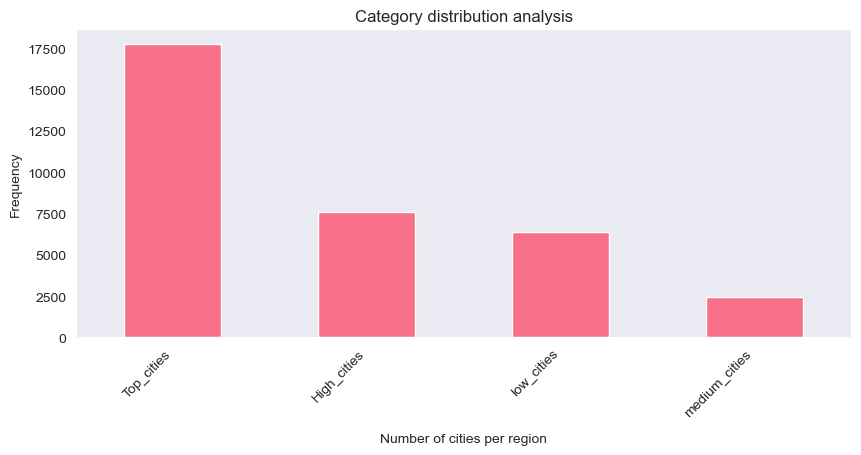

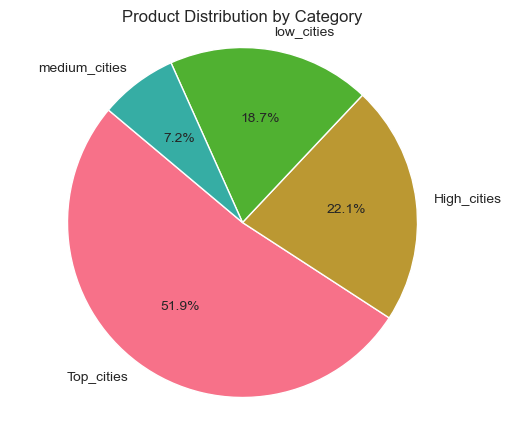

In [76]:
# Determine distribution analysis on the category (Bar Chart)

category_count = df['city_category'].value_counts(ascending=False)

plt.figure(figsize=(10,4))
category_count.plot(kind='bar')
plt.title('Category distribution analysis')
plt.xlabel('Number of cities per region', labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.show()

# Determine category disribution by percentage (Pie Chart)
category_counts = df['city_category'].value_counts()

plt.figure(figsize=(6,5))
plt.pie(x=category_counts.values, labels=category_counts.index, 
        autopct='%1.1f%%', startangle=140)
plt.title('Product Distribution by Category')
plt.axis('equal')
plt.show()

In [64]:
def get_city_value_counts(dataframe, category_name):
    return dataframe[dataframe['city_category'] == category_name]['city'].value_counts()

category_list = ['Top_cities', 'High_cities', 'medium_cities', 'low_cities', 'below_1']
all_city_counts = {}
for category in category_list:
    all_city_counts[category] = get_city_value_counts(df, category)

# Convert dictionary to DataFrame directly
city_counts_df = pd.DataFrame(all_city_counts).fillna(0).astype(int)

# Add total column and sort by it
city_counts_df['Total'] = city_counts_df.sum(axis=1)
city_counts_df = city_counts_df.sort_values(by='Total', ascending=False)

city_counts_df

,Top_cities,High_cities,medium_cities,low_cities,below_1,Total
Seattle,10801,0,0,0,0,10801
Portland,1549,0,0,0,0,1549
Spokane,1532,0,0,0,0,1532
Tacoma,1373,0,0,0,0,1373
Olympia,1274,0,0,0,0,1274
...,...,...,...,...,...,...
Kowloon,0,0,0,1,0,1
Kolonia,0,0,0,1,0,1
Kodiak,0,0,0,1,0,1
Klawock,0,0,0,1,0,1


In [59]:
# Determine other status under column 'status'

data_array = df['status'].unique() 

def check_for_status(status_to_find):

    if status_to_find in data_array:
        print(f"Status '{status_to_find}' was found.")
    else:
        print(f"Status '{status_to_find}' was not found.")
        
# check for'inactive'
check_for_status('inactive')

# Check for 'cancelled' status
check_for_status('cancelled')

# check for 'pending' status
check_for_status('pending')


Status 'inactive' was not found.
Status 'cancelled' was not found.
Status 'pending' was not found.
